<div align="center"> <h3><font color='blue'>CSE 4/574 Introduction to Machine Learning, Summer 2025 </font>
<h1> Assignment 2 - Part 2, Part 3 and Bonus

<h3>Jayant Som (jsom@buffalo.edu) </div>

<h3>_______________________________________________________________________________________________________________________________ </div>

<div align="center"> <h1><font color='maroon'> INSURANCE Dataset </font></div>

# LINEAR REGRESSION

## 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Loading

In [2]:
df_insurance = pd.read_csv('./datasets/insurance.csv')

## 3. Dataset Details and Statistics

In [3]:
df_insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df_insurance.shape

(1338, 7)

In [5]:
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 4. Missing-Value Investigation

In [7]:
df_insurance.isnull().sum(axis = 0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values, so no further investigation and cleaning required.

## 5. Unique-Value Investigation

In [8]:
df_insurance.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [9]:
df_insurance['sex'].unique()

array(['female', 'male'], dtype=object)

In [10]:
df_insurance['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [11]:
df_insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## 6. Feature Engineering

#### a. Convertion of string features to categorical

In [12]:
df_insurance = pd.get_dummies(df_insurance, columns=['sex', 'smoker', 'region'], drop_first=True)

In [13]:
df_insurance.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


#### b. Normalization of non-categorical features

In [14]:
def normalize_column(column):
    min_value = column.min()
    max_value = column.max()
    return (column - min_value) / (max_value - min_value)

In [15]:
# Normalizing the numerical columns
numeric_columns = ['age', 'bmi', 'children']

for col in numeric_columns:
    df_insurance[col] = normalize_column(df_insurance[col])

In [16]:
df_insurance = df_insurance.astype(float)
df_insurance.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,16884.92400,0.0,1.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,1725.55230,1.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,4449.46200,1.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,21984.47061,1.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,3866.85520,1.0,0.0,1.0,0.0,0.0


## 7. Correlation Matrix

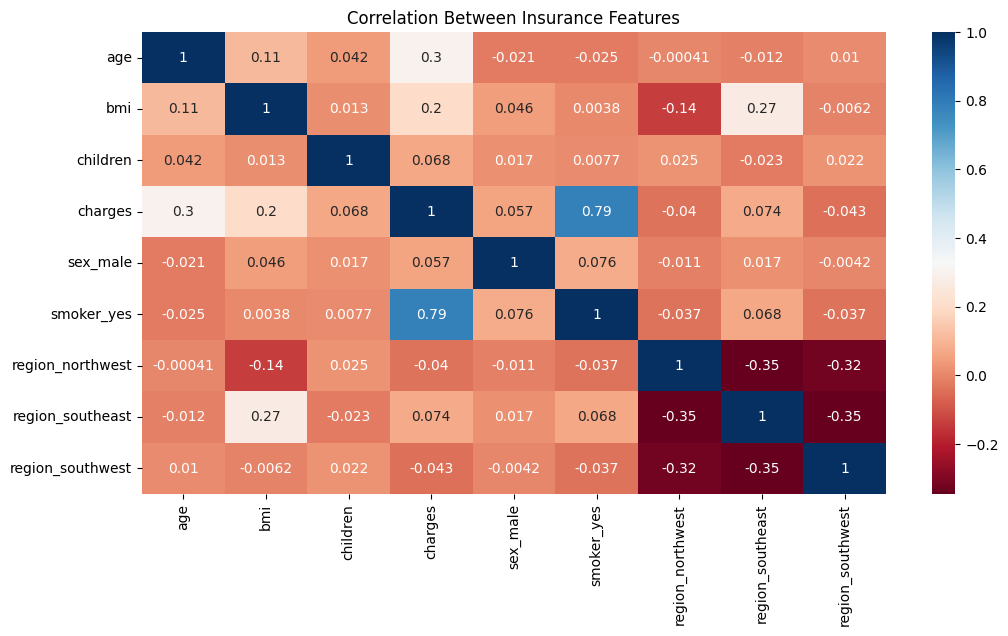

In [17]:
correlation = df_insurance.corr(numeric_only = True)

plt.figure(figsize=(12, 6))

sns.heatmap(correlation, annot= True, cmap= 'RdBu')
plt.title('Correlation Between Insurance Features')

plt.show()

## 8. Feature and Target Separation

In [18]:
# Choosing target y (insurance charges)
y = df_insurance['charges'].values

# Creating matrix X
features = df_insurance.drop('charges', axis=1)
X = features.values

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1338, 8)
Shape of y: (1338,)


## 9. Adding Implicit bias

In [19]:
# Added a column of 1s for the intercept (bias wo)
X = np.column_stack((np.ones(X.shape[0]), X))

# Now X has shape (N, d+1) where d is number of features
# y has shape (N,)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1338, 9)
Shape of y: (1338,)


## 10. Train-Test Splitting

In [20]:
# Assigning seed for reproducibility
np.random.seed(11)  
index = np.arange(X.shape[0])

# Calculating split point
split_pt = int(0.8 * X.shape[0])

# Splitting the data based on the split point - 80%-20%
X_train = X[index[:split_pt]]
y_train = y[index[:split_pt]]
X_test = X[index[split_pt:]]
y_test = y[index[split_pt:]]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1070, 9)
y_train shape: (1070,)
X_test shape: (268, 9)
y_test shape: (268,)


# LINEAR REGRESSION

## 1. Calculation of weights using OLS formula

In [21]:
# Calculating the weights using OLS equation
def ols_weight_calculator(X, y):
    # Transpose of X
    X_transpose = X.T
    
    # Matrix multiplication of X transpose and X
    X_transpose_X = X_transpose @ X
    
    # Calculating the inverse of (X.T @ X)
    inv_X_transpose_X = np.linalg.inv(X_transpose_X)
    
    # Multiplying inverse with X.T
    inv_X_transpose = inv_X_transpose_X @ X_transpose
    
    # Finally multiplying with y to get weights
    w = inv_X_transpose @ y
    
    return w

In [22]:
# Calculating weights using training data
linear_reg_weights = ols_weight_calculator(X_train, y_train)

print("Linear Regression Weights vector:\n")
print(f"Intercept (w0): {linear_reg_weights[0]:.4f}")
for i, col in enumerate(features.columns, 1):
    print(f"{col} (w{i}): {linear_reg_weights[i]:.4f}")

Linear Regression Weights vector:

Intercept (w0): -1779.4677
age (w1): 11936.5531
bmi (w2): 12607.6535
children (w3): 2195.8382
sex_male (w4): -253.8023
smoker_yes (w5): 23653.4332
region_northwest (w6): -471.6674
region_southeast (w7): -1119.2883
region_southwest (w8): -1245.9259


## 2. Predictions

In [23]:
def predict(X, weights):
    return X @ weights

In [24]:
# Making predictions on test set
y_pred = predict(X_test, linear_reg_weights)

## 3. RMSE Calculations

In [25]:
# Calculating the value of RMSE
def rmse_calculator(y_true, y_pred):
    errors_squared = (y_true - y_pred) ** 2
    mse = np.mean(errors_squared)
    return np.sqrt(mse)

In [26]:
linear_reg_rmse = rmse_calculator(y_test, y_pred)
print(f"\nLinear Regression RMSE: {linear_reg_rmse:.2f}\n")


Linear Regression RMSE: 6097.21



## 4. Plot : Actual VS Predicted

In [27]:
# Sorting y_test and y_pred based on y_test values in ascending order
sorted_indices = np.argsort(y_test)
y_test_sorted = y_test[sorted_indices]

In [28]:
# Creating x-axis as the index of sorted data points
x_axis = np.arange(len(y_test_sorted))

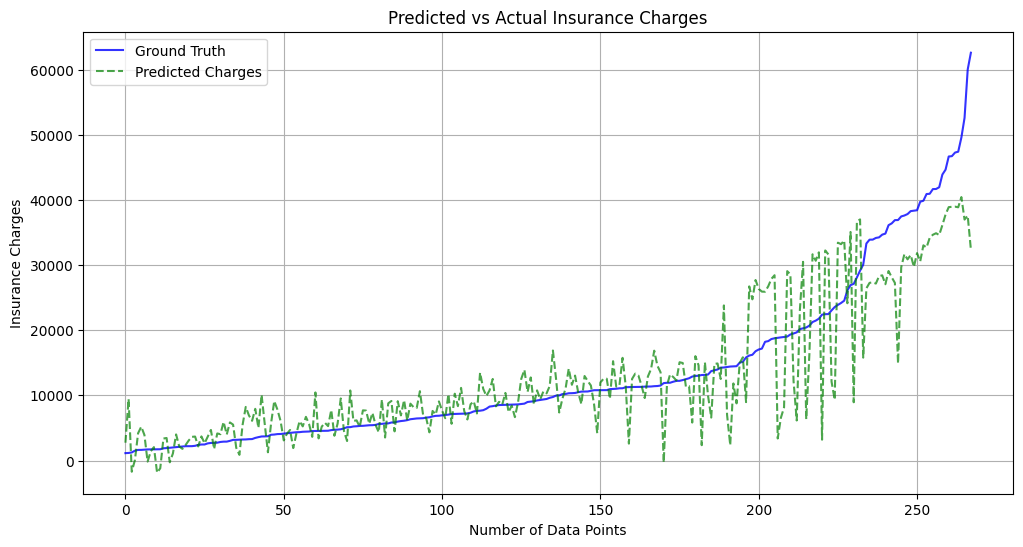

In [29]:
# Sorting y_pred based on y_test values in ascending order
y_pred_sorted = y_pred[sorted_indices]

plt.figure(figsize=(12, 6))

# Plotting ground truth (sorted y_test)
plt.plot(x_axis, y_test_sorted, 'b-', label = 'Ground Truth', alpha = 0.8)

# Plotting predictions (sorted y_pred)
plt.plot(x_axis, y_pred_sorted, 'g--', label = 'Predicted Charges', alpha = 0.7)

plt.xlabel('Number of Data Points')
plt.ylabel('Insurance Charges')
plt.title('Predicted vs Actual Insurance Charges')

plt.legend()
plt.grid(True)
plt.show()

# RIDGE REGRESSION

## 1. Calculation of weights using Ridge regression formula

In [30]:
def ridge_weights_calculator(X, y, lambda_val):

    X_transpose_X = X.T @ X
    
    ridge_matrix = X_transpose_X + lambda_val * np.eye(X.shape[1])
    ridge_matrix[0, 0] = X_transpose_X[0, 0]
    
    inv_ridge_matrix = np.linalg.inv(ridge_matrix)
    
    w = inv_ridge_matrix @ X.T @ y
    
    return w

## 2. Finding the best penalty

In [31]:
lambda_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 5000, 1000000]
best_ridge_rmse = float('inf')
best_ridge_lambda = 0
best_ridge_y_pred = None

for lambda_val in lambda_values:
    ridge_weights = ridge_weights_calculator(X_train, y_train, lambda_val)
    y_pred_ridge = predict(X_test, ridge_weights)
    rmse_ridge = rmse_calculator(y_test, y_pred_ridge)
    
    print(f"Lambda: {lambda_val:.1f}, RMSE: {rmse_ridge:.2f}")
    
    if rmse_ridge < best_ridge_rmse:
        best_ridge_rmse = rmse_ridge
        best_ridge_lambda = lambda_val
        best_ridge_y_pred = y_pred_ridge

print(f"\nRidge lambda: {best_ridge_lambda}, Ridge RMSE: {best_ridge_rmse:.2f}")

Lambda: 0.0, RMSE: 6097.21
Lambda: 0.0, RMSE: 6097.23
Lambda: 0.1, RMSE: 6097.47
Lambda: 1.0, RMSE: 6100.50
Lambda: 10.0, RMSE: 6176.85
Lambda: 100.0, RMSE: 7591.30
Lambda: 1000.0, RMSE: 11171.18
Lambda: 5000.0, RMSE: 12124.17
Lambda: 1000000.0, RMSE: 12408.47

Ridge lambda: 0.001, Ridge RMSE: 6097.21


## 3. Weights using best lambda

In [32]:
ridge_weights = ridge_weights_calculator(X_train, y_train, best_ridge_lambda)

print("\nRidge Regression Weights vector:\n")
print(f"Intercept (w0): {ridge_weights[0]:.4f}")
for i, col in enumerate(features.columns, 1):
    print(f"{col} (w{i}): {ridge_weights[i]:.4f}")


Ridge Regression Weights vector:

Intercept (w0): -1779.2377
age (w1): 11936.4648
bmi (w2): 12607.1815
children (w3): 2195.8154
sex_male (w4): -253.7905
smoker_yes (w5): 23653.2884
region_northwest (w6): -471.6616
region_southeast (w7): -1119.2175
region_southwest (w8): -1245.8982


## 4. Plotting

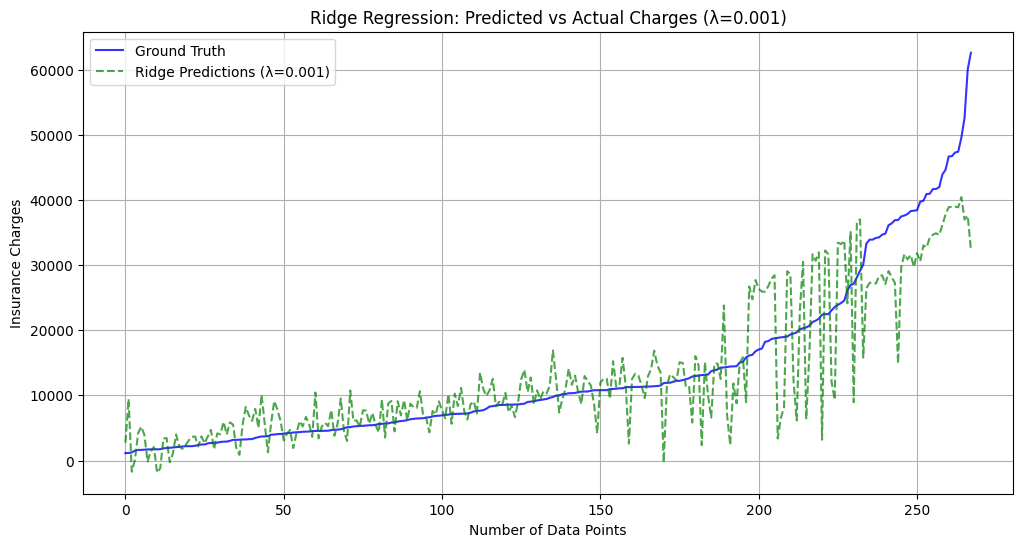

In [33]:
# Sorting best_ridge_y_pred based on y_test values
ridge_pred_sorted = best_ridge_y_pred[sorted_indices]

plt.figure(figsize=(12, 6))

# Plotting ground truth
plt.plot(x_axis, y_test_sorted, 'b-', label = 'Ground Truth', alpha=0.8)

# Plotting predictions
plt.plot(x_axis, ridge_pred_sorted, 'g--', label = f'Ridge Predictions (λ={best_ridge_lambda})', alpha = 0.7)

plt.xlabel('Number of Data Points')
plt.ylabel('Insurance Charges')
plt.title(f'Ridge Regression: Predicted vs Actual Charges (λ={best_ridge_lambda})')

plt.legend()
plt.grid(True)
plt.show()

# GRADIENT DESCENT

## 1. Calculation of updated weights using Gradient Descent

In [34]:
def gradient_descent(X, y, learning_rate, max_iter, stop = 1e-6):
    
    w = np.zeros(X.shape[1])
    
    for i in range(max_iter):

        gradient = 2 * (X.T @ (X @ w - y)) + 2 * best_ridge_lambda * w
        
        w_new = w - learning_rate * gradient
        
        if np.linalg.norm(w_new - w) < stop:
            print(f"Converged after {i} iterations")
            break
            
        w = w_new
    
    return w

In [35]:
gd_weights = gradient_descent(X_train, y_train, learning_rate = 0.0001, max_iter = 10000)

print("\nGradient Descent Weights vector:")
print(f"Intercept (w0): {gd_weights[0]:.4f}")
for i, col in enumerate(features.columns, 1):
    print(f"{col} (w{i}): {gd_weights[i]:.4f}")

Converged after 3928 iterations

Gradient Descent Weights vector:
Intercept (w0): -1779.2160
age (w1): 11936.4578
bmi (w2): 12607.1589
children (w3): 2195.8098
sex_male (w4): -253.7938
smoker_yes (w5): 23653.2864
region_northwest (w6): -471.6687
region_southeast (w7): -1119.2220
region_southwest (w8): -1245.9042


## 2. Predictions and RMSE Comparison

In [36]:
y_pred_gd = predict(X_test, gd_weights)

rmse_gd = rmse_calculator(y_test, y_pred_gd)
print(f"\nGradient Descent RMSE: {rmse_gd:.2f}")

print(f"Ridge Regression RMSE: {best_ridge_rmse:.2f}")
print(f"Original OLS RMSE: {linear_reg_rmse:.2f}")


Gradient Descent RMSE: 6097.21
Ridge Regression RMSE: 6097.21
Original OLS RMSE: 6097.21


## 3. Plotting

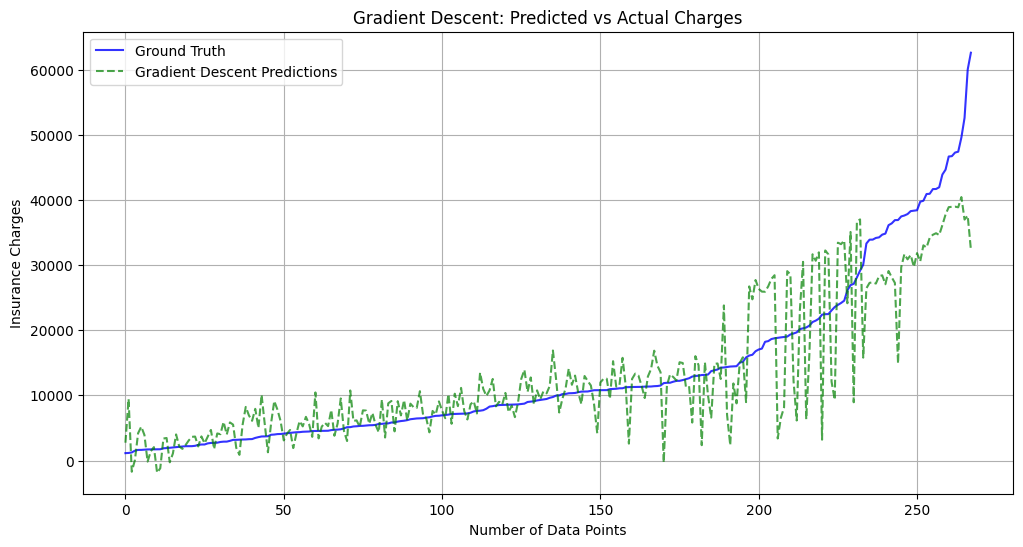

In [37]:
# Sorting y_pred_gd based on y_test values
gd_pred_sorted = y_pred_gd[sorted_indices]

plt.figure(figsize=(12, 6))

# Plotting ground truth
plt.plot(x_axis, y_test_sorted, 'b-', label = 'Ground Truth', alpha = 0.8)

# Plotting predictions
plt.plot(x_axis, gd_pred_sorted, 'g--', label = 'Gradient Descent Predictions', alpha = 0.7)

plt.xlabel('Number of Data Points')
plt.ylabel('Insurance Charges')
plt.title('Gradient Descent: Predicted vs Actual Charges')

plt.legend()
plt.grid(True)
plt.show()

## 4. Comparisons

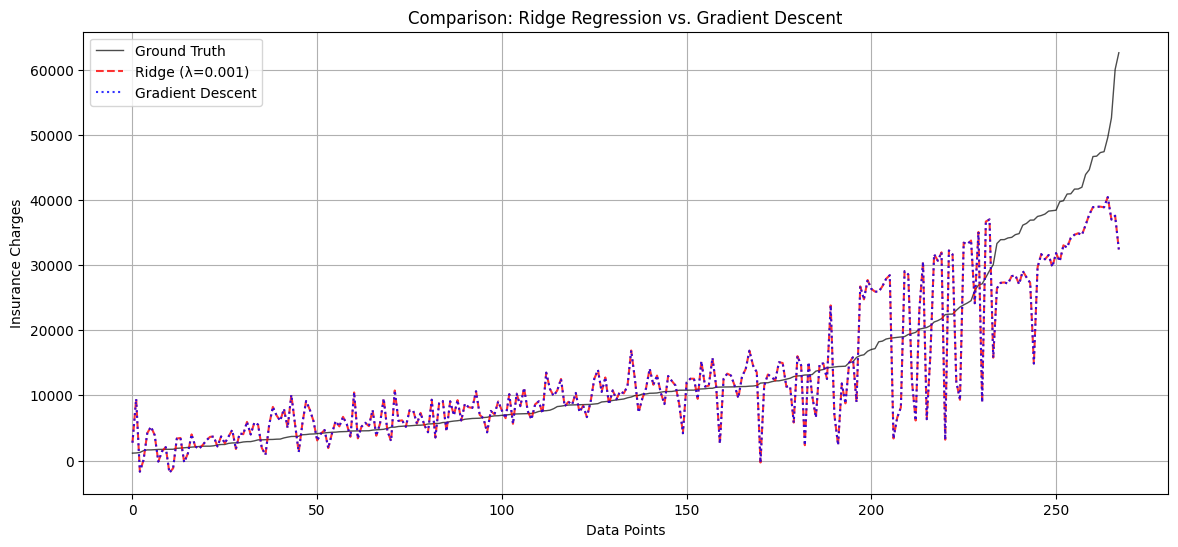

In [38]:
plt.figure(figsize=(14, 6))

plt.plot(y_test_sorted, 'k-', label= 'Ground Truth', linewidth = 1, alpha = 0.7)

plt.plot(ridge_pred_sorted, 'r--', label = f'Ridge (λ={best_ridge_lambda})', linewidth = 1.5, alpha = 0.8)

plt.plot(gd_pred_sorted, 'b:', label = 'Gradient Descent', linewidth = 1.5, alpha = 0.8)

plt.xlabel('Data Points')
plt.ylabel('Insurance Charges')
plt.title('Comparison: Ridge Regression vs. Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

## References Used

https://www.statology.org/ols-regression-python/

https://www.datacamp.com/tutorial/simple-linear-regression

https://www.geeksforgeeks.org/what-is-regression-analysis/#

https://discovery.cs.illinois.edu/guides/Statistics-with-Python/rmse/

https://www.geeksforgeeks.org/python/solving-linear-regression-without-using-sklearn-and-tensorflow/

https://www.geeksforgeeks.org/machine-learning/implementation-of-ridge-regression-from-scratch-using-python/

https://towardsdatascience.com/implementing-gradient-descent-in-python-from-scratch-760a8556c31f/